






<h2 id='part1'>Boston Airbnb Listing Decision Analysis</h2>

This analysis is designed to understand how can Airbnb help a new home owner in Boston to decide the price of a new listing. Specifically, To understand what elements of a listing affects the owners' decision of pricing by answering the following 3 questions:<br>
1. Is there a seasonality of the price of the listings in Boston?
2. How do the average prices in different neighbourhood in Boston differenciate?
3. What are the top 10 features of a listing that will affect its pricing?
<br>
<br>
First, let's clean up this data set:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import datetime
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('./boston/listings.csv')
calendar = pd.read_csv('./boston/calendar.csv')
reviews = pd.read_csv('./boston/reviews.csv')

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [6]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [8]:
calendar = calendar.dropna()

In [9]:
calendar.loc[:,'Month'] = pd.to_datetime(calendar['date']).dt.strftime('%m')
calendar.loc[:,'DoW'] = pd.to_datetime(calendar['date']).dt.strftime('%A')

Since the class of the price is object, we need to clean and format the price:

In [10]:
import locale

locale.setlocale(locale.LC_ALL,'')
calendar['price']=calendar.price.map(lambda x: locale.atof(x.strip('$')))


**Question 1: Is there a seasonality of the price of the listings in Boston?**

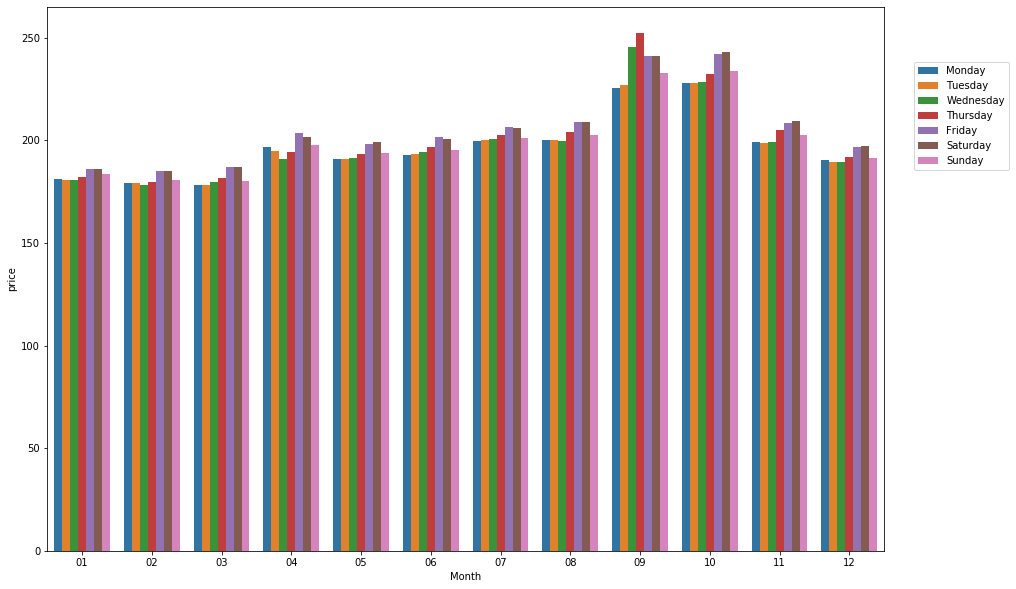

In [84]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
seasonality = calendar.groupby(['DoW','Month'])['price'].mean()
seasonality = seasonality.reset_index()
key = seasonality['DoW'].map(mapping)
seasonality =seasonality.iloc[key.argsort()]
seasonality = seasonality.reset_index()
plt.figure(figsize=(15,10))
seasonalityplot = sns.barplot(x="Month", y="price",hue="DoW",
             hue_order=['Monday', 'Tuesday', 'Wednesday', 
                        'Thursday', 'Friday', 'Saturday', 'Sunday'], data=seasonality)
seasonalityplot.legend(loc='center left', bbox_to_anchor=(1.03, 0.8), ncol=1)

plt.show()

In [12]:
print(calendar.groupby(['Month'])['price'].mean())

Month
01    182.799671
02    180.961028
03    181.818742
04    197.252890
05    193.712295
06    196.535302
07    202.486309
08    203.330142
09    237.047727
10    233.416248
11    202.924416
12    192.601915
Name: price, dtype: float64


In [13]:
print(calendar.groupby(['DoW'])['price'].mean())

DoW
Friday       203.121167
Monday       195.809561
Saturday     203.408387
Sunday       198.219764
Thursday     198.073112
Tuesday      195.173842
Wednesday    195.418228
Name: price, dtype: float64


September and October is the peak of the price while from December to March is the slow season in Boston. Friday and Saturday have the heighest price while Monday to Wednesday have the lowest. Interesting to see the relatively high price on the Mondays and Sundays in April, which is the probably result from the famous Boston Marathorn that held on a April Monday in 2016. Another interesting fact is the highest price in September is on Thursday. 


**Question 2: How do the average prices in different neighbourhood in Boston differenciate?**

In [14]:
listings = listings.rename(columns={'id' : 'listing_id','price':'listings_price'})
listingswDate = listings.merge(calendar , on ='listing_id')
listingswDate['neighbourhood_cleansed'].value_counts()

Dorchester                 63587
Jamaica Plain              61742
Back Bay                   57070
South End                  54071
Fenway                     43363
Allston                    34293
South Boston               32981
Beacon Hill                31753
Downtown                   31243
Brighton                   31199
Roxbury                    29756
East Boston                29291
North End                  23581
Charlestown                21272
Mission Hill               16138
Roslindale                 13541
South Boston Waterfront    13377
Chinatown                  13037
West End                   10880
West Roxbury               10281
Mattapan                    6702
Hyde Park                   5732
Bay Village                 5732
Longwood Medical Area       1690
Leather District             725
Name: neighbourhood_cleansed, dtype: int64

<Figure size 7200x3600 with 0 Axes>

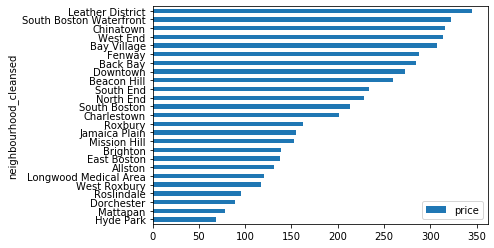

In [87]:
neighbourhood = listingswDate.groupby(['neighbourhood_cleansed'])['price'].mean().to_frame()
neighbourhood.sort_values(by = 'price').plot(kind = 'barh');

In [16]:
print(neighbourhood.sort_values(by = 'price'))

                              price
neighbourhood_cleansed             
Hyde Park                 68.849267
Mattapan                  78.546852
Dorchester                88.586708
Roslindale                95.099623
West Roxbury             116.500924
Longwood Medical Area    119.975148
Allston                  131.200332
East Boston              137.514117
Brighton                 137.695279
Mission Hill             152.692093
Jamaica Plain            154.378251
Roxbury                  162.668638
Charlestown              201.740410
South Boston             213.372366
North End                228.128324
South End                234.064341
Beacon Hill              260.172897
Downtown                 272.504561
Back Bay                 284.633275
Fenway                   287.441044
Bay Village              307.268667
West End                 314.023989
Chinatown                315.753624
South Boston Waterfront  322.201988
Leather District         344.682759


Although listings vary in size and quality, the average price in different neighbourhood would provide a benchmark for the new hosts who is trying to decide the price of their listings. Leather District is the highest in Boston with an average price of \\$344.7 and Hyde Park having the lowest average price of \\$68.8

**Question 3: What are the top 10 features of a listing that will affect its pricing?**



First, select a list of variables that's interesting to see their impact on the price. 

In [17]:
listingswDate.head().transpose()

,0,1,2,3,4
listing_id,3075044,3075044,3075044,3075044,3075044
listing_url,https://www.airbnb.com/rooms/3075044,https://www.airbnb.com/rooms/3075044,https://www.airbnb.com/rooms/3075044,https://www.airbnb.com/rooms/3075044,https://www.airbnb.com/rooms/3075044
scrape_id,20160906204935,20160906204935,20160906204935,20160906204935,20160906204935
last_scraped,2016-09-07,2016-09-07,2016-09-07,2016-09-07,2016-09-07
name,Charming room in pet friendly apt,Charming room in pet friendly apt,Charming room in pet friendly apt,Charming room in pet friendly apt,Charming room in pet friendly apt
summary,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...
space,Small but cozy and quite room with a full size...,Small but cozy and quite room with a full size...,Small but cozy and quite room with a full size...,Small but cozy and quite room with a full size...,Small but cozy and quite room with a full size...
description,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...
experiences_offered,none,none,none,none,none
neighborhood_overview,"The room is in Roslindale, a diverse and prima...","The room is in Roslindale, a diverse and prima...","The room is in Roslindale, a diverse and prima...","The room is in Roslindale, a diverse and prima...","The room is in Roslindale, a diverse and prima..."


In [18]:
listingswDate['property_type'].value_counts()

Apartment          452350
House              122934
Condominium         33430
Bed & Breakfast     10914
Townhouse            8162
Loft                 5395
Other                4249
Boat                 3677
Entire Floor          829
Camper/RV             339
Villa                 335
Guesthouse            159
Dorm                  116
Name: property_type, dtype: int64

In [19]:
listingswDate['room_type'].value_counts()

Entire home/apt    374990
Private room       251331
Shared room         16716
Name: room_type, dtype: int64

In [20]:
listingswDate['bathrooms'].value_counts()

1.0    482511
2.0     86753
1.5     39981
2.5     14994
0.0      3358
3.0      3198
3.5      2894
5.0      1547
6.0      1390
0.5      1016
4.0       608
4.5       333
Name: bathrooms, dtype: int64

In [21]:
listingswDate['bedrooms'].value_counts()

1.0    418898
2.0    123929
0.0     52656
3.0     32361
4.0      9016
5.0      2909
Name: bedrooms, dtype: int64

In [22]:
listingswDate['accommodates'].value_counts()

2     257808
4     114061
1      82397
3      71567
5      45692
6      39514
8      12576
7      10148
10      3278
9       2205
12      1309
11      1131
16       694
14       657
Name: accommodates, dtype: int64

In [23]:
listingswDate.loc[listingswDate['accommodates'] >6,'accommodates']=">=7"

In [24]:
listingswDate['beds'].value_counts()

1.0    380822
2.0    168446
3.0     51654
4.0     23455
5.0      8194
6.0      4117
8.0      1670
7.0      1499
9.0       470
0.0       315
Name: beds, dtype: int64

In [25]:
listingswDate['host_is_superhost'].value_counts()

f    561540
t     81497
Name: host_is_superhost, dtype: int64

In [26]:
listingswDate['availability_365'].value_counts()

365    37595
364    34580
248    13640
340    13600
179    11814
359    10770
309    10197
356     8900
325     8775
337     8425
361     7942
360     7200
331     6951
363     6897
341     6820
358     6802
350     6650
347     6593
344     6536
342     6498
353     6354
334     6346
348     6264
329     6251
310     6200
343     6174
324     6156
362     6154
336     6048
318     6042
349     5933
328     5904
345     5865
357     5712
305     5490
338     5408
335     5360
333     5328
339     5085
279     5022
311     4976
327     4905
323     4845
298     4768
313     4695
330     4620
315     4410
355     4260
326     4238
299     4186
319     4147
314     4082
312     4056
300     3900
322     3864
351     3861
346     3806
308     3696
332     3652
304     3648
290     3480
306     3366
320     3200
352     3168
316     3160
321     2889
354     2832
148     2664
296     2664
291     2619
249     2490
303     2424
302     2416
301     2408
297     2376
117     2340
285     2280

In [27]:
listingswDate['availability_30'].value_counts()

0     115385
29     53474
30     52140
5      33439
4      27117
2      26181
3      22987
6      22660
7      21108
11     19926
1      18159
9      17961
10     16821
8      15531
15     13781
24     13148
14     13056
26     12915
12     12309
13     12193
28     11785
17     11684
18     11614
20      9571
27      9166
21      9123
23      8923
25      8409
19      7680
22      7439
16      7352
Name: availability_30, dtype: int64

In [28]:
listingswDate['availability_60'].value_counts()

0     70449
59    52111
60    48183
35    15668
4     14047
54    13592
56    12021
36    11716
23    11300
5     10753
20    10686
34    10140
21     9824
58     9587
48     9523
53     9323
29     9189
19     9118
45     8750
12     8644
13     8610
57     8573
26     8491
10     8461
18     8393
42     8305
55     8227
51     8072
32     7880
31     7849
43     7729
37     7699
24     7678
33     7646
11     7600
22     7597
38     7572
40     7456
39     7261
27     7254
28     7075
44     7025
9      6983
3      6983
47     6906
50     6838
16     6827
14     6710
8      6657
25     6548
30     6522
7      6484
41     6342
17     6180
6      6149
52     5989
46     5462
1      5407
15     4703
49     4532
2      3738
Name: availability_60, dtype: int64

In [29]:
listingswDate['availability_90'].value_counts()

89    50732
90    45966
0     42173
65    15243
86    12045
84    10907
34    10686
66    10018
81     9615
83     9540
35     9245
78     9025
69     8904
50     8904
53     8833
62     8770
43     8530
88     8298
61     8191
85     8128
64     8059
72     8051
4      7948
87     7936
56     7912
49     7684
75     7546
59     7441
73     7126
67     6941
54     6904
68     6853
74     6768
33     6716
44     6596
80     6553
70     6495
47     6438
36     6367
51     6362
82     6353
57     6330
30     6169
52     6117
77     5911
58     5765
55     5712
38     5680
39     5576
63     5519
37     5503
79     5503
46     5470
60     5389
48     5215
29     5176
32     4841
42     4798
71     4621
41     4583
3      4477
45     4286
40     4279
15     3764
25     3720
76     3616
22     3346
1      3246
31     3206
27     3044
28     3039
23     2940
21     2732
5      2674
14     2644
7      2579
24     2507
19     2468
6      2441
2      2421
13     2385
10     2363
18     2360
9   

In [30]:
listingswDate['number_of_reviews'].value_counts()

0      115881
1       53605
2       36460
3       29825
4       26991
5       16618
8       15880
7       15071
9       14693
6       14265
10      10731
14      10460
15      10013
13       9173
19       9133
11       8975
12       8521
17       8025
16       7921
23       7649
20       7633
21       7210
24       6333
22       6175
30       6096
33       5988
29       5479
26       5314
18       5243
32       4574
31       4541
36       4355
38       4184
27       4151
25       3611
34       3244
43       3243
55       3171
39       3022
35       2883
47       2811
49       2786
42       2774
37       2612
28       2477
40       2386
57       2335
62       2329
68       2314
65       2197
46       1950
54       1932
48       1917
41       1853
81       1727
60       1726
67       1724
80       1699
74       1683
59       1677
58       1641
52       1608
83       1552
63       1490
64       1488
73       1487
70       1402
56       1335
88       1281
90       1272
44       1270
50    

In [31]:
bins = [0, .9, 2,10,50,100000]
labels = ["0","1-2","3-10","11-50",">50"]
listingswDate['number_of_reviews_bucket'] = pd.cut(listingswDate['number_of_reviews'], bins=bins, labels=labels)

In [32]:
listingswDate['number_of_reviews_bucket'].value_counts()

11-50    198429
3-10     144074
>50       94588
1-2       90065
0             0
Name: number_of_reviews_bucket, dtype: int64

In [33]:
listingswDate['bed_type'].value_counts()

Real Bed         617298
Airbed             9013
Futon              8685
Pull-out Sofa      5713
Couch              2328
Name: bed_type, dtype: int64

In [34]:
listingswDate['require_guest_phone_verification'].value_counts()

f    584501
t     58536
Name: require_guest_phone_verification, dtype: int64

In [35]:
listingswDate['cancellation_policy'].value_counts()

strict             324102
moderate           157683
flexible           132081
super_strict_30     29171
Name: cancellation_policy, dtype: int64

In [36]:
listingswDate['require_guest_profile_picture'].value_counts()

f    627001
t     16036
Name: require_guest_profile_picture, dtype: int64

In [37]:
listingswDate['review_scores_value'].value_counts()

9.0     234438
10.0    186668
8.0      72640
7.0      10516
6.0       9998
4.0       1338
2.0       1144
5.0        365
3.0        341
Name: review_scores_value, dtype: int64

In [38]:
listingswDate.loc[listingswDate['review_scores_value'] <8,'review_scores_value']="<=7"

In [39]:
listingswDate['review_scores_rating'].value_counts()

100.0    87298
93.0     39097
96.0     37332
95.0     32438
97.0     30034
98.0     28692
80.0     28358
90.0     28291
92.0     23123
91.0     22390
94.0     22239
87.0     20023
88.0     15944
99.0     14379
89.0     12998
86.0     10666
85.0     10483
84.0      8144
83.0      6544
60.0      5039
75.0      3515
82.0      3503
70.0      3340
78.0      2777
79.0      2515
73.0      2258
81.0      2213
77.0      1974
40.0      1591
64.0      1384
71.0      1370
76.0      1296
67.0      1068
74.0      1033
65.0       920
47.0       728
20.0       701
66.0       621
58.0       364
69.0       362
62.0       362
50.0       361
55.0       353
68.0       342
46.0       148
53.0        66
Name: review_scores_rating, dtype: int64

In [40]:
listingswDate['review_scores_cleanliness'].value_counts()

10.0    274324
9.0     157929
8.0      52972
7.0      15901
6.0       7536
4.0       4316
5.0       2779
2.0       1385
3.0        334
Name: review_scores_cleanliness, dtype: int64

In [41]:
listingswDate.loc[listingswDate['review_scores_cleanliness'] <8,'review_scores_cleanliness']="<=7"

In [42]:
listingswDate['minimum_nights'].value_counts()

1      252328
2      185421
3      103102
7       27197
4       23245
5       15028
10      14024
30       6734
14       3108
15       3046
6        2161
20       1267
28       1209
32       1129
60       1100
27        582
21        460
200       365
90        365
273       365
11        364
13        248
25        152
9          36
8           1
Name: minimum_nights, dtype: int64

In [43]:
listingswDate.loc[listingswDate['minimum_nights'] >3,'minimum_nights']=">=4"

In [44]:
listingswDate['guests_included'].value_counts()

1     458100
2      99186
4      32311
3      19109
0      15607
6       9368
5       6789
8        955
12       337
14       328
9        327
7        323
10       297
Name: guests_included, dtype: int64

In [45]:
listingswDate['cleaning_fee'].value_counts()

$100.00    60806
$50.00     59537
$25.00     35378
$150.00    24628
$10.00     20975
$20.00     19250
$30.00     18189
$75.00     17388
$225.00    15756
$40.00     15668
$15.00     15311
$60.00     14547
$80.00     14332
$125.00    13058
$200.00    12225
$95.00     10729
$45.00     10249
$35.00      9493
$65.00      6939
$5.00       6763
$70.00      5685
$85.00      5273
$119.00     4620
$250.00     3953
$136.00     3900
$120.00     3853
$49.00      3547
$99.00      2907
$90.00      2804
$55.00      2502
$175.00     1861
$139.00     1666
$130.00     1419
$135.00     1359
$8.00       1261
$140.00     1132
$166.00     1058
$199.00      990
$69.00       971
$29.00       825
$300.00      701
$28.00       695
$79.00       681
$13.00       638
$115.00      625
$9.00        592
$12.00       543
$160.00      490
$6.00        460
$7.00        421
$54.00       407
$110.00      359
$24.00       353
$105.00      344
$66.00       344
$129.00      342
$57.00       339
$158.00      335
$197.00      3

In [46]:
listingswDate['cleaning_fee']= listingswDate['cleaning_fee'].replace({'\$':''}, regex = True).astype(float)

In [47]:
bins = [0,50,100,100000]
labels = ["0-50","50-100","> 200"]
listingswDate['cleaning_fee_bucket'] = pd.cut(listingswDate['cleaning_fee'], bins=bins, labels=labels)

In [48]:
listingswDate['cleaning_fee_bucket'].value_counts()

0-50      220622
50-100    148002
> 200      95614
Name: cleaning_fee_bucket, dtype: int64

In [49]:
listingswDate['host_response_rate'].value_counts()

100%    403087
98%      42244
89%      29289
90%      17831
96%      15415
99%       9965
97%       8472
92%       7795
80%       7599
79%       6155
94%       6004
77%       5841
93%       4327
95%       4176
70%       3953
73%       3784
60%       3455
71%       3200
91%       3071
75%       3058
50%       2815
86%       2798
78%       2703
67%       2683
0%        2183
81%       2149
85%       2097
83%       1765
40%       1421
69%       1382
88%       1372
84%        716
14%        687
31%        638
82%        512
10%        453
43%        365
6%         364
17%        362
33%        351
61%        347
57%        341
68%        324
30%        321
38%        298
64%        263
19%        261
56%        254
36%        152
25%         27
Name: host_response_rate, dtype: int64

In [50]:
listingswDate.loc[listingswDate['host_response_rate'] !="100%",'host_response_rate']="not 100%"

In [51]:
listingswDate['host_response_time'].value_counts()

within an hour        284985
within a few hours    241486
within a day           84771
a few days or more      7883
Name: host_response_time, dtype: int64

In [52]:
listingswDate['host_has_profile_pic'].value_counts()

t    641924
f      1113
Name: host_has_profile_pic, dtype: int64

In [53]:
listingswDate = listingswDate.query('host_has_profile_pic=="t"')

In [54]:
listingswDate['host_acceptance_rate'].value_counts()

100%    214493
45%      27676
91%      26720
94%      25422
55%      24252
99%      21046
67%      16529
68%      15400
95%      15011
96%      14640
81%      12418
98%      11630
93%      11596
36%       9615
50%       9058
33%       8537
89%       8511
56%       8097
97%       7892
83%       7824
75%       6678
88%       6572
82%       6429
66%       6349
90%       5624
0%        5605
69%       5573
86%       5537
92%       5477
78%       4840
84%       4784
71%       4260
80%       4201
87%       4160
63%       4094
57%       3221
70%       3152
79%       3133
85%       2744
76%       2592
77%       2453
73%       2322
60%       2232
74%       2091
19%       1726
65%       1704
61%       1558
72%       1350
64%       1183
46%       1111
40%       1013
58%        901
20%        767
42%        738
62%        704
38%        689
25%        682
30%        617
29%        521
23%        365
53%        364
54%        356
43%        348
47%        339
18%        318
59%        250
17%       

In [55]:
listingswDate.loc[listingswDate['host_acceptance_rate'] !="100%",'host_acceptance_rate']="not 100%"

In [56]:
listingswDate['host_identity_verified'].value_counts()

t    484761
f    157163
Name: host_identity_verified, dtype: int64

In [57]:
listingswDate['instant_bookable'].value_counts()

f    533365
t    108559
Name: instant_bookable, dtype: int64

In [58]:
listingswDate['host_listings_count'].value_counts()

1      205359
2       93244
3       47270
4       33928
558     27318
749     23796
7       22688
5       21700
52      15149
6       14513
22      14382
11      14208
24      11082
18       9628
307      8885
8        8144
16       7301
12       6733
313      6578
13       5821
15       5671
30       5548
14       4340
21       3949
9        3388
17       3328
10       3322
122      3288
37       3015
28       2875
20       2477
363      2449
71        365
0         176
45          6
Name: host_listings_count, dtype: int64

In [59]:
listingswDate = listingswDate.query('host_listings_count!=0')

In [60]:
listingswDate.loc[listingswDate['host_listings_count']>1,'host_listings_count']="More than 1 listing"

In [61]:
listingswDate['extra_people'].value_counts()

$0.00      372292
$25.00      62287
$20.00      46426
$10.00      32733
$15.00      26120
$50.00      25905
$30.00      14068
$40.00       9828
$35.00       9291
$100.00      6910
$45.00       5648
$5.00        4991
$24.00       2150
$49.00       2034
$12.00       1720
$39.00       1512
$37.00       1391
$70.00       1384
$60.00       1366
$75.00       1268
$19.00       1131
$80.00       1093
$17.00       1074
$65.00        756
$36.00        674
$18.00        664
$55.00        628
$22.00        610
$8.00         473
$150.00       449
$7.00         438
$34.00        412
$85.00        365
$59.00        362
$58.00        341
$200.00       339
$29.00        312
$62.00        308
$33.00        306
$16.00        298
$9.00         290
$69.00        275
$27.00        211
$42.00        154
$77.00        146
$44.00         85
$125.00        75
$120.00        60
$89.00         56
$88.00         39
Name: extra_people, dtype: int64

In [62]:
listingswDate['extra_people']= listingswDate['extra_people'].replace({'\$':''}, regex = True).astype(float)
bins = [-1,0.9,50,10000]
labels = [0,"1-50",">50"]
listingswDate['extra_people_bucket'] = pd.cut(listingswDate['extra_people'], bins=bins, labels=labels)

In [63]:
listingswDate['extra_people_bucket'].value_counts()

0       372292
1-50    253236
>50      16220
Name: extra_people_bucket, dtype: int64

In [64]:
listingswDate['reviews_per_month'].value_counts()

1.00     18100
2.00      8370
0.09      4947
0.25      4896
0.23      4860
         ...  
2.64         3
4.89         3
5.41         2
10.41        1
12.95        1
Name: reviews_per_month, Length: 638, dtype: int64

In [65]:
bins = [-1,1,4,10000]
labels = ["0-1","1-4",">4"]
listingswDate['reviews_per_month_bucket'] = pd.cut(listingswDate['reviews_per_month'], bins=bins, labels=labels)

In [66]:
listingswDate['review_scores_accuracy'].value_counts()

10.0    284593
9.0     170579
8.0      44058
7.0       7626
6.0       6417
4.0       1604
5.0        791
2.0        685
Name: review_scores_accuracy, dtype: int64

In [67]:
listingswDate.loc[listingswDate['review_scores_accuracy'] <8,'review_scores_accuracy']="<=7"

In [68]:
listingswDate['security_deposit'].value_counts()

$100.00      62478
$500.00      52952
$200.00      27661
$300.00      25618
$250.00      18224
$150.00      12903
$400.00      10814
$1,000.00     8934
$95.00        6914
$99.00        3456
$350.00       3161
$600.00       2602
$450.00       2254
$1,500.00     2057
$199.00       1748
$800.00       1356
$180.00       1261
$125.00       1099
$750.00       1065
$950.00        727
$2,500.00      725
$375.00        640
$2,000.00      469
$1,250.00      377
$275.00        367
$179.00        357
$175.00        357
$700.00        353
$240.00        349
$223.00        348
$3,000.00      343
$475.00        342
$425.00        340
$301.00        339
$120.00        325
$446.00        306
$185.00        301
$1,900.00      300
$399.00        291
$128.00        264
$4,000.00      214
$650.00        177
$307.00        135
$1,200.00      111
$299.00         40
$325.00         34
$118.00         30
$147.00         28
$298.00          9
$4,500.00        1
Name: security_deposit, dtype: int64

In [69]:
listingswDate['security_deposit']= listingswDate['security_deposit'].replace({'\$':'','\,':''}, regex = True).astype(float)
bins = [-1,100,500,100000]
labels = ["<=100","100-500",">500"]
listingswDate['security_deposit_bucket'] = pd.cut(listingswDate['security_deposit'], bins=bins, labels=labels)

In [70]:
listingswDate['security_deposit_bucket'].value_counts()

100-500    162897
<=100       72848
>500        19811
Name: security_deposit_bucket, dtype: int64

In [71]:
df = pd.get_dummies(listingswDate,columns =['property_type', 'room_type', 'accommodates','host_is_superhost', 
                                            'number_of_reviews_bucket', 'bed_type', 'require_guest_phone_verification',
                                            'cancellation_policy', 'require_guest_profile_picture', 'review_scores_value',
                                            'review_scores_cleanliness','minimum_nights', 'cleaning_fee_bucket',
                                            'host_response_rate', 'host_response_time', 'host_acceptance_rate', 
                                            'host_identity_verified', 'instant_bookable', 'host_listings_count',
                                            'extra_people_bucket', 'reviews_per_month_bucket', 'review_scores_accuracy', 
                                            'security_deposit_bucket','neighbourhood_cleansed','Month','DoW'])

In [72]:
df.head().transpose()

,0,1,2,3,4
listing_id,3075044,3075044,3075044,3075044,3075044
listing_url,https://www.airbnb.com/rooms/3075044,https://www.airbnb.com/rooms/3075044,https://www.airbnb.com/rooms/3075044,https://www.airbnb.com/rooms/3075044,https://www.airbnb.com/rooms/3075044
scrape_id,20160906204935,20160906204935,20160906204935,20160906204935,20160906204935
last_scraped,2016-09-07,2016-09-07,2016-09-07,2016-09-07,2016-09-07
name,Charming room in pet friendly apt,Charming room in pet friendly apt,Charming room in pet friendly apt,Charming room in pet friendly apt,Charming room in pet friendly apt
summary,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...
space,Small but cozy and quite room with a full size...,Small but cozy and quite room with a full size...,Small but cozy and quite room with a full size...,Small but cozy and quite room with a full size...,Small but cozy and quite room with a full size...
description,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...,Charming and quiet room in a second floor 1910...
experiences_offered,none,none,none,none,none
neighborhood_overview,"The room is in Roslindale, a diverse and prima...","The room is in Roslindale, a diverse and prima...","The room is in Roslindale, a diverse and prima...","The room is in Roslindale, a diverse and prima...","The room is in Roslindale, a diverse and prima..."


In [73]:
df = df.drop(['listing_id','listing_url','scrape_id','last_scraped','name','summary','space','description',
              'experiences_offered','neighborhood_overview','notes','transit','access','interaction','house_rules',
             'thumbnail_url','medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_since',
             'host_location','host_about','host_thumbnail_url','host_picture_url','host_verifications','street',
             'host_neighbourhood','host_has_profile_pic','neighbourhood','neighbourhood_group_cleansed','city','state',
             'zipcode','market','smart_location','country_code','country','latitude','longitude','is_location_exact',
              'amenities','listings_price','weekly_price','monthly_price','calendar_updated','has_availability',
             'availability_30','availability_60','availability_90','availability_365','calendar_last_scraped',
             'first_review','last_review','review_scores_checkin','review_scores_rating','review_scores_communication',
             'review_scores_location','requires_license','license','jurisdiction_names','calculated_host_listings_count',
             'date','available','cleaning_fee','extra_people','security_deposit'],axis=1)

In [74]:
df=df.fillna(0)

In [75]:
y=df['price']
data = df.drop(['price'],axis=1)
features = list(data.columns.values.tolist()) 
X_train, X_test, y_train, y_test = train_test_split(data,y , test_size=0.3)
print(X_train.shape, y_train.shape,
X_test.shape, y_test.shape)

(449223, 138) (449223,) (192525, 138) (192525,)


In [76]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

Feature ranking:
1 22 room_type_Entire home/apt 0.24316157347204764
2 1 bathrooms 0.12444496142437261
3 82 extra_people_bucket_1-50 0.0564694787701064
4 81 extra_people_bucket_0 0.04839138808597905
5 63 minimum_nights_>=4 0.033497785618198946
6 97 neighbourhood_cleansed_Beacon Hill 0.025498803157616302
7 0 host_total_listings_count 0.02422526542951375
8 8 reviews_per_month 0.023140167143766734
9 5 guests_included 0.02058074712982446
10 67 host_response_rate_100% 0.020102243769359682
11 68 host_response_rate_not 100% 0.019345161899532462
12 2 bedrooms 0.017458721854774848
13 98 neighbourhood_cleansed_Brighton 0.014612029374011591
14 104 neighbourhood_cleansed_Fenway 0.012236877010383675
15 47 cancellation_policy_moderate 0.010825985528361275
16 64 cleaning_fee_bucket_0-50 0.009427433482130605
17 3 beds 0.009356469950148442
18 76 host_identity_verified_t 0.009294670848194795
19 126 Month_08 0.009163172638272371
20 75 host_identity_verified_f 0.00872567516025983
21 125 Month_07 0.00788886

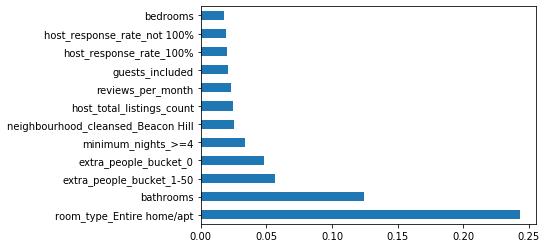

In [88]:
#Take a look at the feature importance
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f + 1, indices[f], features[indices[f]],importances[indices[f]])

# Plot the feature importances of the forest
pd.Series(importances, index=X_train.columns).nlargest(12).plot(kind='barh')
plt.show()